## Table of Content
#### 1. Merge datasets
#### 2. Statistics
#### 3. Correlation Analysis
#### 4. Recommendations

In [1]:
import pandas as pd
import numpy as np

In [2]:
co2_data = pd.read_excel("C:\\Users\\Omotayo Muka\\funmike\\Data Analysis\\co2_production.xlsx", sheet_name=0)
gni_data = pd.read_excel("C:\\Users\\Omotayo Muka\\funmike\\Data Analysis\\gross_national_income_per_capital.xlsx", sheet_name=0)
hdi_data = pd.read_excel("C:\\Users\\Omotayo Muka\\funmike\\Data Analysis\\human_development_index.xlsx", sheet_name=0)
life_expectancy_data = pd.read_excel("C:\\Users\\Omotayo Muka\\funmike\\Data Analysis\\life_expectancy_by_birth.xlsx", sheet_name=0)


## Merge Datasets

In [3]:

# Merge datasets with suffixes to handle duplicate column names
merged_data = pd.merge(co2_data, gni_data, on="Country", how="inner", suffixes=("_co2", "_gni"))
merged_data = pd.merge(merged_data, hdi_data, on="Country", how="inner", suffixes=("_merged", "_hdi"))
merged_data = pd.merge(merged_data, life_expectancy_data, on="Country", how="inner", suffixes=("_merged", "_le"))


In [4]:
# List of African countries
african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo (Congo-Brazzaville)", "Côte d'Ivoire (Ivory Coast)", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

# Filter the DataFrame to include only African countries
df_africa_data = merged_data[merged_data['Country'].isin(african_countries)]

In [5]:
df_africa_data.head(10)

,ISO3_co2,Country,hdicode_co2,region_co2,hdi_rank_2021_co2,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,AGO,Angola,Medium,SSA,148.0,0.429586,0.413433,0.408015,0.439647,0.286180,...,58.6231,59.3074,60.0397,60.6546,61.0923,61.6798,62.1438,62.4484,62.2612,61.6434
11,BDI,Burundi,Low,SSA,187.0,0.038399,0.042797,0.038023,0.039180,0.039753,...,58.4927,59.2346,59.8684,60.2172,60.7931,61.5526,61.6884,62.3514,61.5663,61.6627
13,BEN,Benin,Low,SSA,166.0,0.126673,0.142389,0.147828,0.173432,0.192222,...,58.7159,58.9654,59.1249,59.3771,59.5394,59.8558,60.1403,60.4537,60.0880,59.8210
14,BFA,Burkina Faso,Low,SSA,184.0,0.066119,0.069230,0.067786,0.065589,0.065691,...,57.6187,57.8234,58.3589,58.8454,59.3262,59.5361,60.0466,60.0391,59.7306,59.2696
27,BWA,Botswana,Medium,SSA,117.0,2.098611,1.986245,2.036810,2.283595,2.112954,...,60.8004,61.9958,62.6076,63.8183,65.4644,66.7526,65.4224,65.4636,65.6471,61.1409
28,CAF,Central African Republic,Low,SSA,188.0,0.065272,0.066191,0.065622,0.064954,0.066619,...,50.6861,50.9020,50.5655,52.7930,53.4601,53.7207,54.3693,55.0253,54.6042,53.8947
34,CMR,Cameroon,Medium,SSA,151.0,0.221119,0.219840,0.216993,0.222775,0.214731,...,57.7922,58.4761,58.9355,59.6580,60.2333,60.8103,61.1798,61.5839,60.8328,60.3334
38,COM,Comoros,Medium,SSA,156.0,0.160236,0.155594,0.159506,0.163108,0.158520,...,61.8340,62.2244,62.5158,62.8956,63.2368,63.6254,63.9117,64.0684,64.1665,63.4174
39,CPV,Cabo Verde,Medium,SSA,128.0,0.281888,0.285729,0.298687,0.300284,0.301748,...,74.4838,75.0590,75.2400,74.6195,75.7423,76.5928,75.7331,76.0042,74.8077,74.0518
45,DJI,Djibouti,Low,AS,171.0,0.465449,0.470945,0.488494,0.485776,0.470977,...,60.8479,61.2212,61.6411,61.9570,62.1908,62.7966,63.0381,63.0854,62.6943,62.3049


## Exploring of the complex interplay between economic, social, and environmental factors in shaping Africa's developmental trajectory.

In [6]:
# Summary statistics
print(df_africa_data.describe())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns



       hdi_rank_2021_co2  co2_prod_1990  co2_prod_1991  co2_prod_1992  \
count          48.000000      47.000000      48.000000      48.000000   
mean          152.520833       0.911538       0.940706       0.901784   
std            32.929964       1.823709       1.921892       1.734570   
min            63.000000       0.038399       0.042797       0.038023   
25%           136.750000       0.079573       0.083905       0.078602   
50%           164.000000       0.236698       0.216818       0.215153   
75%           176.250000       0.664978       0.755244       0.791357   
max           191.000000       8.504575       9.378858       7.960721   

       co2_prod_1993  co2_prod_1994  co2_prod_1995  co2_prod_1996  \
count      48.000000      49.000000      49.000000      49.000000   
mean        0.928443       0.920005       0.948146       0.949357   
std         1.778862       1.835356       1.893553       1.854749   
min         0.039180       0.035778       0.039779       0.039904 

## Correlation Analysis

In [7]:
correlation_matrix = df_africa_data.corr(numeric_only=True)
print(correlation_matrix)

                   hdi_rank_2021_co2  co2_prod_1990  co2_prod_1991  \
hdi_rank_2021_co2           1.000000      -0.590386      -0.584395   
co2_prod_1990              -0.590386       1.000000       0.997537   
co2_prod_1991              -0.584395       0.997537       1.000000   
co2_prod_1992              -0.615853       0.998235       0.996348   
co2_prod_1993              -0.622643       0.998310       0.996434   
...                              ...            ...            ...   
2017                       -0.769197       0.388219       0.394495   
2018                       -0.764432       0.391003       0.398210   
2019                       -0.759805       0.383163       0.389784   
2020                       -0.766314       0.391597       0.398862   
2021                       -0.713423       0.340605       0.350236   

                   co2_prod_1992  co2_prod_1993  co2_prod_1994  co2_prod_1995  \
hdi_rank_2021_co2      -0.615853      -0.622643      -0.604151      -0.605654 

In [8]:
df_africa_data.columns

Index([         'ISO3_co2',           'Country',       'hdicode_co2',
              'region_co2', 'hdi_rank_2021_co2',     'co2_prod_1990',
           'co2_prod_1991',     'co2_prod_1992',     'co2_prod_1993',
           'co2_prod_1994',
       ...
                      2012,                2013,                2014,
                      2015,                2016,                2017,
                      2018,                2019,                2020,
                      2021],
      dtype='object', length=145)

In [9]:
import pandas as pd
#import janitor

# Clean the column names
#df_africa_data = df_africa_data.clean_names()

In [10]:
# Narrow down dataset to 2021
selected_columns = ['Country', 'hdicode_co2', 'co2_prod_2021', 'gnipc_2021', 'hdi_2021', 2021]

# Create a new DataFrame with only the selected columns
selected_df = df_africa_data[selected_columns]

# Now, 'selected_df' contains only the columns you specified
# You can use 'selected_df' for further analysis or visualization


In [11]:
# Summary statistics
print(selected_df.describe())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

       co2_prod_2021    gnipc_2021   hdi_2021       2021
count      49.000000     49.000000  48.000000  49.000000
mean        1.187450   5484.797875   0.560000  62.976435
std         1.921907   5628.968090   0.109032   5.790648
min         0.035370    731.786709   0.385000  52.525400
25%         0.145716   1908.241590   0.489750  59.652300
50%         0.355729   3344.311825   0.534500  61.662700
75%         1.019209   6230.200199   0.621500  65.821000
max         7.620420  25830.617750   0.802000  76.376700


In [12]:
correlation_matrix = selected_df.corr(numeric_only=True)
print(correlation_matrix)

               co2_prod_2021  gnipc_2021  hdi_2021      2021
co2_prod_2021       1.000000    0.782626  0.672749  0.392235
gnipc_2021          0.782626    1.000000  0.866925  0.552211
hdi_2021            0.672749    0.866925  1.000000  0.722035
2021                0.392235    0.552211  0.722035  1.000000


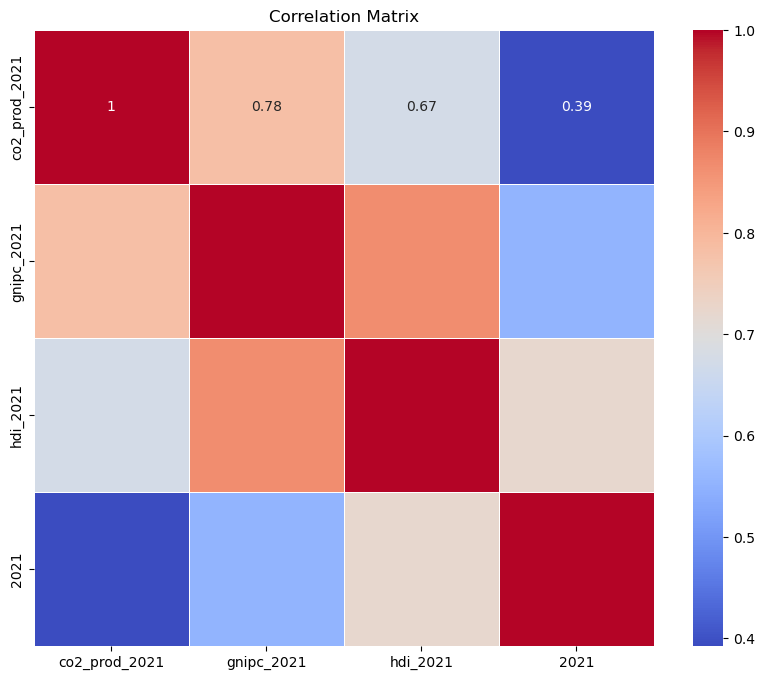

In [13]:
# Calculate correlation matrix
correlation_matrix = selected_df.corr(numeric_only=True)
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
from scipy import stats

# T-test to compare CO2 emissions between high and low HDI countries
high_hdi = df_africa_data[df_africa_data["hdi_2021"] > df_africa_data["hdi_2021"].median()]
low_hdi = df_africa_data[df_africa_data["hdi_2021"] <= df_africa_data["hdi_2021"].median()]

t_stat, p_value = stats.ttest_ind(high_hdi["co2_prod_2021"], low_hdi["co2_prod_2021"])
print(f"T-statistic: {t_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Statistically significant difference")
else:
    print("No statistically significant difference")


T-statistic: 4.050722533019269, p-value: 0.00019436021664150557
Statistically significant difference


In [16]:
t_stat, p_value = stats.ttest_ind(high_hdi[2021], low_hdi[2021])
print(f"T-statistic: {t_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Statistically significant difference")
else:
    print("No statistically significant difference")

T-statistic: 3.0850504557114977, p-value: 0.003438924139297617
Statistically significant difference


In [17]:
t_stat, p_value = stats.ttest_ind(high_hdi["gnipc_2021"], low_hdi["gnipc_2021"])
print(f"T-statistic: {t_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Statistically significant difference")
else:
    print("No statistically significant difference")

T-statistic: 5.486584717459716, p-value: 1.6901852184447398e-06
Statistically significant difference


## Analyze the correlation between Human Development Index (HDI) and life expectancy in African countries.

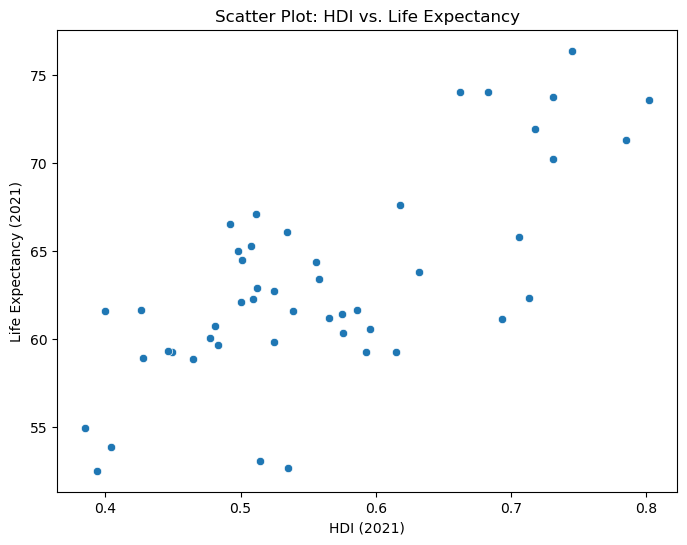

In [19]:
# Scatter plot of HDI vs. Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(data= df_africa_data, x="hdi_2021", y=2021)
plt.xlabel("HDI (2021)")
plt.ylabel("Life Expectancy (2021)")
plt.title("Scatter Plot: HDI vs. Life Expectancy")
plt.show()


# Recommendations
#### 1. Political instability is one of the biggest problem of Africa, it is essential that an early warning system is put in place to address potential sources of instability before they escalate. 
#### 2. Shift from fossil fuel-based energy sources to renewable energy, such as solar, wind, and hydropower to reduce CO2 production 
#### 3. Promote sustainable and eco-friendly agricultural practices, including organic farming, agroforestry, and precision agriculture. 
#### 4. Encourage investments in sustainable projects through green finance initiatives. 
#### 5. Implementing measures that improve response capabilities thereby reducing the impact of future pandemics on public health and socio-economic well-being.